

```
# This is formatted as code
```

# Assignment 4: Differentiation and optimization

In [1]:
import sympy as sym # symbolic differentiation
import jax          # algorithmic differentiation
import jax.numpy as np
import matplotlib.pyplot as plt

## Question 1: Differentiations

Function 

$$f(a, b) = \frac a b cos(a)^2 \exp \left( - \frac {a^2} {b^2}\right)$$

is given.

1. Derive the partial derivatives of $f(a, b)$ by $a$ and $b$. (Write them in this text)

    $$\frac {\partial f} {\partial a} = $$
    $$\frac {\partial f} {\partial b} = $$

2. Implement the derivatives as Python functions:
  1. According to symbolic expressions. (print the expressions)
  2. Using algorithmic differentiation (with `jax`).
      * For a two variable function, $ f(a,b) $, its gradients by $x$ and $y$ can be obtained like this: df_dxy = jax.grad(f, argnums=(0, 1)). The x, and y derivatives are then: df_dxy[0] = df_dx, and df_dxy[1] = df_dy.

$-$

  
Compare the accuracy of symbolic and algorithmic differentiation:


1.   Choose a number of points in the range: $a\in(-20, 20)$, and $b\in(1, 100)$.
2.   Calculate the squared error between simbolic and algorithmic differentiation for each set of points $(a,b)$.
3. Average all the errors. (print the average error obtained)



In [417]:
a = sym.Symbol('a')
b = sym.Symbol('b')
def function1(a,b):## a=first.  b=second
  temp=(a/b)*sym.cos(a)**2
  ans=temp*(sym.exp(-(a**2)/(b**2)))
  return ans
  #Derive partial of derivatives by a and b 

In [310]:
##symbolic and algorithmic differentiation for some points  (𝑎,𝑏)
def SymbolicAL(a,b):
  tmp=sym.exp(-a**2/b**2)
  x=-2*a**2*tmp
  y=sym.cos(a)/(b**3)
  z=2*a*tmp*sym.sin(a)
  w=tmp*cos(a)**2
  result=x*y-z/b + w/b
  return result



  def function2(a,b):
  npcos=np.cos(a)**2
  npex=np.exp(-a**2/b**2)
  ans=(a/b)*(npcos*npex)
  return ans

In [311]:

def derviatives_algo():
  ##algorithmic differentiation using jax method
  return jax.grad(function2,argnums=(0, 1))





In [74]:
sym.diff(function1(a,b),b)###df/dx of b


2*a**3*exp(-a**2/b**2)*cos(a)**2/b**4 - a*exp(-a**2/b**2)*cos(a)**2/b**2

In [75]:
sym.diff(function1(a,b),a)###df/dx of a

-2*a**2*exp(-a**2/b**2)*cos(a)**2/b**3 - 2*a*exp(-a**2/b**2)*sin(a)*cos(a)/b + exp(-a**2/b**2)*cos(a)**2/b

3. Plot 
  * $f(a, 10)$, $\frac {\partial f(a, 10)} {\partial a}$ for range $a \in [-20, 20]$, 
  * $f(10, b)$, $\frac {\partial f(10, b)} {\partial b}$ for range $b \in 1, 100$.

In [133]:
def foo1(a):##helper function to print f(a,10) 
  x=np.exp((-1)*(a**2/ 100))
  ans=(a/10)*np.cos(a)*np.cos(a)
  return ans*x

In [134]:
def foo2(b):##helper function to print f(10,b)
  x=np.exp((-1)*(100/ b**2))
  ans=(10/b)*np.cos(10)*np.cos(10)
  return ans*x

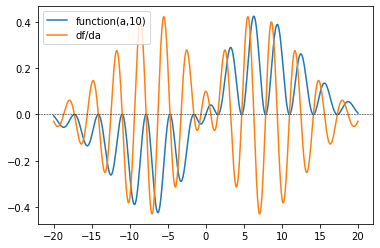

In [135]:
#plot f(a,10) function

x = np.linspace(-20, 20, 1000)
plt.plot(x, [foo1(x) for x in x], label="function(a,10)")
plt.plot(x, [jax.grad(foo1)(x) for x in x], label="df/da")
plt.axhline(0, lw=0.5, ls='dashed', color='black')
plt.legend()

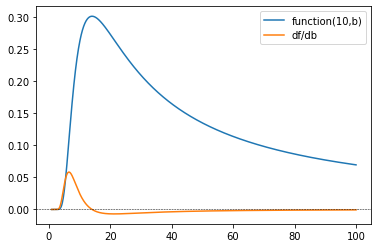

In [136]:
#plot f(10,b) function
y = np.linspace(1,100,1000)
plt.plot(y, [foo2(y) for y in y], label="function(10,b)")
plt.plot(y, [jax.grad(foo2)(y) for y in y], label="df/db")
plt.axhline(0, lw=0.5, ls='dashed', color='black')
plt.legend()

4. Implement a function for approximate numerical differentiation, given the difference size $h$.

In [257]:
##implementation our approximate function
#i use the values of a,b abd there are no need to x that was
def appro_diff(f,a,b,h):
   """Differentiates f at x numerically, using h as the difference.
  """
   return (((f(a+h,b)-f(a,b))/h),((f(a,b+h)-f(a,b))/h))
 

5. Find the best difference size $h$ for differentiating
   * $f(3, 10)$ by $a$.
   * $f(1, 1)$ by $b$.

(Print the best step size, the derivative obtained and the difference between the numerical and the exact (algorithmic or symbolic) derivatives)

The best difference size minimizes the error of numerical differentiation relative to the exact differentiation.

Note: In this excercise it is recommended to use gradient descent, however a simple search is also accepted.


In [312]:
#print the best between the numerical and the exact  derivatives
##this function is the best difference size for differentiating by a
def optimize_drev_a(a, b):
  ##drev_func=derviatives_algo()
    h = 0.1
    x=(a/b)*sym.cos(a)*sym.cos(a)
    temp_a_f = sym.exp((-1)*(a**2/ b**2))*x
    y=(a/b)*sym.cos(a+h)*sym.cos(a+h)
    temp_a_f_h = sym.exp((-1)*((a+h)**2/ b**2))*y
    res = 0.1
    #res is the best step size
    res_df_a = (temp_a_f_h - temp_a_f) / h
    min = abs(res_df_a - derviatives_algo()(a,b)[0])    
    while(abs(temp_a_f_h - temp_a_f)!=0):
      t=(a/b)*sym.cos(a+h)*sym.cos(a+h)
      temp_a_f_h = sym.exp((-1)*((a+h)**2/ b**2))*t
      res_df_a = (temp_a_f_h - temp_a_f) / h
      value = abs(res_df_a - derviatives_algo()(a,b)[0])
      #value is the best difference size minimizes
      if min > value:
        min = value
        res = h
      h *= h
     
    return res

In [314]:
#print the best between the numerical and the exact  derivatives
##this function is the best difference size for differentiating by b
 
def optimize_drev_b(a, b):
  ##drev_func=derviatives_algo()
    h = 0.1
    x=(a/b)*sym.cos(a)*sym.cos(a)
    tmp_b_f = sym.exp((-1)*(a**2/ b**2))*x
    tmp_b_f_h = (a/(b+h))*sym.cos(a)*sym.cos(a)*sym.exp((-1)*(a**2/ (b+h)**2))
    res_df_b = (tmp_b_f_h - tmp_b_f) / h
    min = abs(res_df_b - derviatives_algo()(a,b)[1])
    res = 0.1
   #res is the best step size

    while(abs(tmp_b_f_h - tmp_b_f) != 0):
      t=(a/(b+h))*sym.cos(a)*sym.cos(a)
      tmp_b_f_h = sym.exp((-1)*(a**2/ (b+h)**2))*t
      res_df_b = (tmp_b_f_h - tmp_b_f) / h
      value = abs(res_df_b - derviatives_algo()(a,b)[1])
      #value is the best difference size minimizes
      if min > value:
        min = value
        res = h
      h *= h
      
    return res  


In [316]:
print("The best difference size in (3,10) by a")
print(optimize_drev_a(3.0,10.0))


The best difference size in (3,10) by a
1.0000000000000008e-08


In [315]:
print("The best difference size in (1,1) by b")
print(optimize_drev_b(1.0,1.0))

The best difference size in (1,1) by b
1.0000000000000008e-08


## Question 2: Optimization

### Logistic regression

Logistic regression is a statiscal model that models the probability of an event happening. In binary logistic regression there is a single binary dependent variable coded by '0' or '1'.

We can express the data as a tuple $(x,y)=(data,outcome)=(x,0/1)$

To model the probability of event $x$, we can use the logistic function $p(x)=\frac{1}{1+e^{-(x-\mu)/s}}$.

To find the appropiate $\mu$, that maximizes the classifaction accuracy we minimize the loss function $-\sum_{i=1}^N (y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i)))$.

In some cases, we give more importance to correctly classify one event over an other (like contracting an illness over not contracting it), and one way to express this is to add a "fixing parameter" in the loss function. One way this can be achieved is by adding weights: $-\sum_{i=1}^N (W_1y_i \log p(x_i) + W_2(1 - y_i) \log (1 - p(x_i)))$.


For a trial group of 20 rats, ratio of time exposed to a virus and the event of contracting that virus are given as a list of pairs (ratio, illness) (1 corresponds to having the illness):

In [259]:
rats = [(0.47, 0), (0.23, 0), (0.86, 1), (0.22, 0), (0.21, 1),
        (0.31, 0), (0.62, 0), (0.941, 1), (0.27, 0), (0.35, 1),
        (0.18, 0), (0.13, 0), (0.31, 1), (0.99, 1), (0.85, 1), 
        (0.35, 1), (0.6, 1), (0.89, 0), (0.6, 1), (0.92, 0)]

We want to predict rat illness based on the ratio of exposure to a virus. The prediction function is

$$illness = ratio \ge threshold.$$

The loss for this _classification_ problem is:

\begin{aligned}
& L = -\sum_{i=1}^N (W_1illness_i \log p_i + W_2(1 - illness_i) \log (1 - p_i)) \\
\mbox{where} & \\
& p_i = \frac 1 {1 + \exp(threshold - ratio_i)}
\\~\\
\mbox{and } &W_{1}, W_{2} \mbox{ are weights}
\end{aligned}

1. Implement the loss as a function of the threshold, and weights.

In [419]:
def loss(thr, w1 = 1, w2 = 1):
    l = 0
    for pair in rats:
        pi = 1/(1 + np.exp(thr-pair[0]))
        l += w1*pair[1]*np.log(pi) + w2*(1-pair[1])*np.log(1-pi)

        return -l

In [262]:
##implement the loss of threshold, and weights.
def loss_func(thr,w1,w2):##from the forom
  ans = 0
  for pair in rats:
    pi = 1/(1 + np.exp(thr - pair[0]))
    ans += w1 * pair[1] * np.log(pi) + w2 * (1-pair[1]) * np.log(1-pi)
  return -ans

2. Plot the loss and the derivative of the loss by the threshold in the range $threshold \in (0.01, 0.99)$, and $ W_1, W_2 = 1$.

In [277]:
##helper to plot using jax
def thr_derivative_loss(thr,w1,w2):
  return jax.grad(loss_func,0)(thr,w1,w2)
  

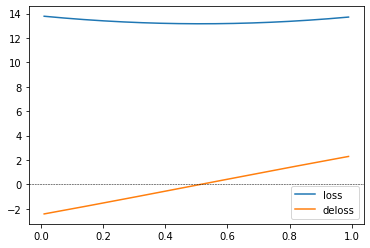

In [319]:
#Plot the loss and the derivative of the loss by the threshold
x = np.linspace(0.01,0.99,200)
plt.plot(x, [loss_func(x,1,1) for x in x], label="loss")
plt.plot(x,[thr_derivative_loss(x,1,1) for x in x],label="deloss")
plt.axhline(0, lw=0.5, ls='dashed', color='black')
plt.legend()

3. Find the best threshold using gradient descent, and $ W_1, W_2$ such that the number of true positives (rats which have the illness and were correctly classified) is greater than $80\%$, but the number of false positives ( rats which dont have the illness and were misclassified) is not $100\%$. (Note: you can fix $W_2$ to be 1)

In [382]:
##Finding the best threshold and w1,w2 (weights) using gradient descent

def gd(f, x0, w1,w2,step=0.1, decay=0.01, niter=100):
  """approximates minimum of f starting from x0
  """
  i=0
  temp= x0
  while i<niter:
    t=jax.grad(f)(temp,w1,w2)
    temp -= t*step
    step *= decay
    i+=1
  return temp

def check_thr_fun(t):
  
  h_rats=10
  c_false=0
  l_rats=10
  c_true=0
  
  for i in rats:
    tmp=(i[0]>=t)
    if(tmp==True &i[1]==0):
      c_false+=1
    if(tmp==True &i[1]==1):
      c_true+=1
    
  a=(c_false/l_rats*100<100)
  b=(c_true/h_rats*100>80)
  if(a&b):
    return True





In [380]:
mintemp=gd(loss_func,0.1,1,1)
if(check_thr_fun(mintemp)==True):
  print(mintemp)

0.30129904


 4. Find the best threshold using Newton's method, given  𝑊1,𝑊2  from   previous question. (Newton's method was explained in class). How many iterations were needed?





In [423]:

##Find the best threshold using Newton's method
def newton(f,x0, niter=10):
  df = jax.grad(f,0)
  ddf = jax.grad(df,0)
  tmp = x0
  i=0
  while i<niter:
    tmp -=df(tmp)/ddf(tmp)
    i+=1
  return tmp
##iterations that we need
print(newton(loss,0.1*random(),20))



21.764406


5. Show actual vs. predicted recoveries as a scatter plot for the best threshold. How many recoveries were misclassified?

Text(0, 0.5, 'illnesses')

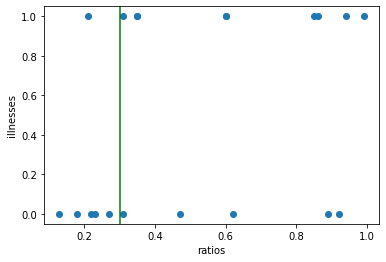

In [401]:
thr=gd(loss_func,0.1,1,1)##recoveries that were misclassified
plt.scatter([rat[0] for rat in rats], [rat[1] for rat in rats] )
plt.axvline(x=thr, color="green")
plt.xlabel("ratios")
plt.ylabel("illnesses")
